# COMPARISON LIRPA VS DECOMON: FULLY CONNECTED MNIST

# PART A: TENSORFLOW

In [1]:
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import sys
sys.path.append('..')
import os.path
import os
import pickle as pkl
from contextlib import closing
import time

In [2]:
import os
import tensorflow.keras as keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Lambda, Activation, Reshape, \
Conv2D, Add, Flatten, Dense, Layer, MaxPooling2D, Subtract, Concatenate, Multiply, Add, Subtract
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
print('Notebook run using keras:', keras.__version__)
import sys
sys.path.append('..')
import decomon
from decomon.models import convert
from decomon import get_upper_box, get_lower_box, get_range_box, get_range_noise

Notebook run using keras: 2.4.0


In [3]:
from auto_LiRPA import BoundedModule, BoundedTensor, PerturbationLpNorm

### Build and Train a Neural Network on a sinusoide

The sinusoide funtion is defined on a $[-1 ; 1 ]$ interval. We put a factor in the sinusoide to have several periods of oscillations. 


In [4]:
x = np.linspace(-1, 1, 1000)
y = np.sin(10*x)

We approximate this funciton by a fully connected network composed of 4 hidden layers of size 100, 100, 20 and 20 respectively. Rectified Linear Units (ReLU) are chosen as activation functions for all the neurons. 

In [5]:
layers = []
layers.append(Dense(100, activation='relu', input_dim=1)) # specify the dimension of the input space
layers.append(Dense(100, activation='relu'))
layers.append(Dense(20, activation='relu'))
layers.append(Dense(20, activation='relu'))
layers.append(Dense(1, activation='linear'))
model = Sequential(layers)

we specify the optimization method and the metric, in this case a classical Means Square Error. 

In [6]:
model.compile('adam', 'mse')

we train the neural network

In [7]:
#model.fit(x, y, batch_size=32, shuffle=True, epochs=100, verbose=0) 
# verbose=0 removes the printing along the training

In [8]:
model.load_weights('toto')

In [9]:
import torch
from torch import nn
import torch.nn.functional as F

In [10]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden_0 = nn.Linear(1, 100) # input_dim = 1; output_dim = 100
        self.hidden_1 = nn.Linear(100, 100)
        self.hidden_2 = nn.Linear(100, 20)
        self.hidden_3 = nn.Linear(20, 20)
        self.hidden_4 = nn.Linear(1, 20)
        
        self.layers = [self.hidden_0, self.hidden_1, self.hidden_2, self.hidden_3, self.hidden_4]

    def forward(self, x):
        x = self.hidden_0(x)
        x = F.relu(x)
        x = self.hidden_1(x)
        x = F.relu(x)
        x = self.hidden_2(x)
        x = F.relu(x)
        x = self.hidden_3(x)
        x = F.relu(x)
        x = self.hidden_4(x)
        #x = F.relu(x)
        return x
        #x = x.view(-1, 128)
        #return x
        
    def reset_weights(self, model):
        
        layers = model.layers
        for layer_keras, layer_torch in zip(layers, self.layers):
            
            weights = layer_keras.get_weights()
            layer_torch.weight.data = torch.from_numpy(np.transpose(weights[0]))
            layer_torch.bias.data = torch.from_numpy(np.transpose(weights[1]))

In [11]:
model_torch = NeuralNet()
model_torch.reset_weights(model)

In [12]:
model_torch.reset_weights(model)

In [36]:
# convert our model into a decomon model:
decomon_model_0 = convert(model, IBP=True, forward=False, mode='backward')
decomon_model_1 = convert(model,IBP=False, forward=True, mode='backward', n_subgrad=0)
decomon_model_2 = convert(model,IBP=True, forward=True, mode='backward', n_subgrad=0)

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_167


WARNING  14:49:55     DecomonModel model inputs must come from `tf.keras.Input` (thus holding past layer metadata), they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "decomon_model_19" was not an Input tensor, it was generated by layer input_167.
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_167


Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_166


WARNING  14:49:55     DecomonModel model inputs must come from `tf.keras.Input` (thus holding past layer metadata), they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "decomon_model_19" was not an Input tensor, it was generated by layer input_166.
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_166


Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_192


WARNING  14:49:59     DecomonModel model inputs must come from `tf.keras.Input` (thus holding past layer metadata), they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "decomon_model_22" was not an Input tensor, it was generated by layer input_192.
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_192


Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_191


WARNING  14:49:59     DecomonModel model inputs must come from `tf.keras.Input` (thus holding past layer metadata), they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "decomon_model_22" was not an Input tensor, it was generated by layer input_191.
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_191


Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_217


WARNING  14:50:04     DecomonModel model inputs must come from `tf.keras.Input` (thus holding past layer metadata), they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "decomon_model_25" was not an Input tensor, it was generated by layer input_217.
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_217


Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_216


WARNING  14:50:04     DecomonModel model inputs must come from `tf.keras.Input` (thus holding past layer metadata), they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "decomon_model_25" was not an Input tensor, it was generated by layer input_216.
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_216


### check the predictions

In [14]:
x_train_tensor = torch.from_numpy(x[:,None]).float().to('cpu')
y_pred_torch = model_torch(x_train_tensor).cpu().detach().numpy()

In [15]:
y_pred_torch = model_torch(x_train_tensor).cpu().detach().numpy()
y_pred_keras = model.predict(x)

In [16]:
print(np.allclose(y_pred_keras, y_pred_torch))

False


In [17]:
np.max(np.abs(y_pred_keras - y_pred_torch))

8.34465e-07

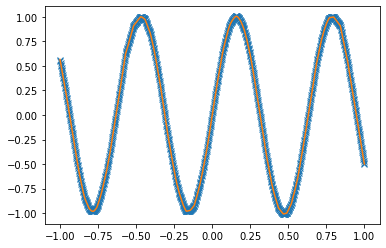

In [18]:
plt.plot(x, y_pred_torch, 'x')
plt.plot(x, y_pred_keras)

In [19]:
# AUTO LIRPA

In [28]:
# define the intervals

def get_range_box_comparison(model_decomon_1, model_torch,  x_min=x.min(), x_max=x.max(), n_split=10):

    alpha = np.linspace(0, 1, n_split+1)
    x_samples = (1-alpha)*x_min + alpha*x_max
    X_min = x_samples[:-1][:, None]
    X_max = x_samples[1:][:, None]
    X_lirpa_ = (X_min + X_max)/2.
    eps = 0.5*(x_max - x_min)/n_split
    print(eps)
    

    # convert X_lirpa into a pytorch tensor
    X_lirpa = torch.from_numpy(X_lirpa_).float().to('cpu')

    model_lirpa = BoundedModule(model_torch, X_lirpa)
    ptb = PerturbationLpNorm(norm=np.inf, eps=eps)
    input_lirpa = BoundedTensor(X_lirpa, ptb)
    lb, ub = model_lirpa.compute_bounds(x=(input_lirpa,), IBP=True, method="backward")

    lb_ = lb.cpu().detach().numpy()
    ub_ = ub.cpu().detach().numpy()
    
    #upper_0, lower_0 = get_range_noise(model_decomon_0, X_lirpa_, eps, p=np.inf)
    upper_, lower_ = get_range_box(model_decomon_1, X_min, X_max, fast=True)
    #upper_ = np.minimum(upper_0, upper_0)
    #lower_ = np.maximum(lower_1, lower_1)
    
    return X_lirpa_, model.predict(X_lirpa_), lb_, ub_, lower_, upper_

In [49]:
x_samples, y_samples, lb_0, ub_0, _, _ = get_range_box_comparison(decomon_model_0, model_torch, n_split=10)

0.1


In [50]:
x_samples, y_samples, _, _, lb_1, ub_1 = get_range_box_comparison(decomon_model_1, model_torch, n_split=10)

0.1


In [51]:
x_samples, y_samples, _, _, lb_2, ub_2 = get_range_box_comparison(decomon_model_2, model_torch, n_split=10)

0.1


In [52]:
n_split=10
x_min=x.min()
x_max=x.max()
alpha = np.linspace(0, 1, n_split+1)
z_samples = (1-alpha)*x_min + alpha*x_max
A_min = z_samples[:-1]
A_max = z_samples[1:]

In [53]:
samples=[]
lb_0_ =[]
ub_0_ =[]
lb_1_ =[]
ub_1_=[]
lb_2_ =[]
ub_2_=[]
for i in range(len(A_min)):
    samples.append(A_min[i])
    samples.append(A_max[i])
    lb_0_+=[lb_0[i]]*2
    ub_0_+= [ub_0[i]]*2
    lb_1_+=[lb_1[i]]*2
    ub_1_+=[ub_1[i]]*2
    lb_2_+=[lb_2[i]]*2
    ub_2_+=[ub_2[i]]*2


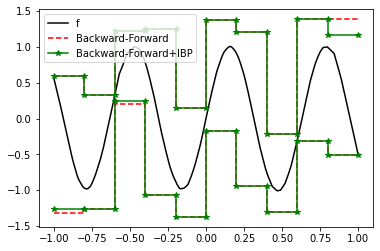

In [57]:
plt.plot(x, y_pred_keras, color='black')
#plt.plot(samples, lb_0_, color='blue')
plt.plot(samples, lb_1_, '--', color='red')
plt.plot(samples, lb_2_, '*-', color='green')
#plt.plot(samples, ub_0_, color='blue')
plt.plot(samples, ub_1_, '--', color='red')
plt.plot(samples, ub_2_, '*-', color='green')
plt.legend(['f', 'Backward-Forward', 'Backward-Forward+IBP'])


In [37]:
lb_2.shape

(10, 1)

In [35]:
samples[0]

array([-0.9])

In [28]:
len(x_samples)

10

In [22]:
_, _, lb_4, ub_4, lb_2, ub_2 = get_range_box_comparison(decomon_model_0, model_torch, n_split=10)

0.1


In [23]:
(ub_0-ub_1).min()

-0.9372124433517435

In [24]:
(ub_1-ub_0).min()

0.004278564453124467

In [25]:
ub_1

array([[ 0.60739517],
       [ 0.36496835],
       [ 1.3900393 ],
       [ 1.50755854],
       [ 0.98550332],
       [ 2.25278199],
       [ 2.13054857],
       [-0.00874083],
       [ 1.49460163],
       [ 1.3896965 ]])

Text(0.5, 1.0, 'backward propagation')

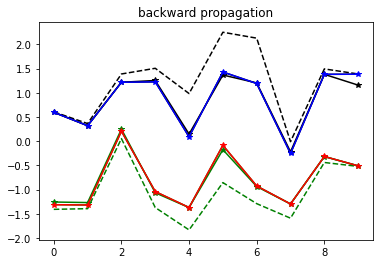

In [26]:
plt.plot(ub_0, c='black')
plt.plot(ub_1, '--', c='black')
plt.plot(ub_2, '*-', c='black')
plt.plot(ub_4, '*-', c='blue')
plt.plot(lb_0, c='green')
plt.plot(lb_1, '--', c='green')
plt.plot(lb_2, '*-', c='green')
plt.plot(lb_4, '*-', c='red')
plt.title('backward propagation')

Text(0.5, 1.0, 'backward propagation')

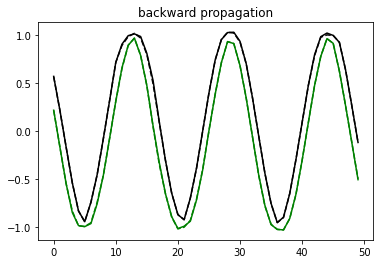

In [25]:
plt.plot(ub_0, c='black')
plt.plot(ub_1, '--', c='black')
plt.plot(lb_0, c='green')
plt.plot(lb_1, '--', c='green')
plt.title('backward propagation')

In [26]:
(ub_0-ub_1).max()

0.03471331596374583

In [25]:
n_split=1
x_min=x.min()
x_max=x.max()
alpha = np.linspace(0, 1, n_split+1)
x_samples = (1-alpha)*x_min + alpha*x_max
X_min = x_samples[:-1][:, None]
X_max = x_samples[1:][:, None]
X_lirpa_ = (X_min + X_max)/2.

In [26]:
Z = np.expand_dims(np.concatenate([X_min, X_max], -1), -1)
output_dec = decomon_model_1.predict([X_min, Z])

In [27]:
_, _, ub_1, wu_f, bu_f, lb_1, wl_f, bl_f, wu_b, bu_b, wl_b, bl_b = output_dec
ub_1 = np.max(ub_1)
wu_f = np.max(wu_f)
bu_f = np.max(bu_f)
lb_1 = np.max(lb_1)
wl_f = np.max(wl_f)
bl_f = np.max(bl_f)
wu_b = np.max(wu_b)
bu_b = np.max(bu_b)
wl_b = np.max(wl_b)
bl_b = np.max(bl_b)


In [28]:
ub_0

array([[7.2799344]], dtype=float32)

In [29]:
lb_0

array([[-8.943093]], dtype=float32)

In [30]:
a = np.linspace(-1, 1, 100)
a_0 = ub_1*np.ones_like(a)
a_1 = wu_f*a + bu_f
a_2 = wu_b*a + bu_b

np.minimum(a_0, a_1, a_2).max()

10.287599563598633

In [31]:
a_2.max()

10.287599563598633

In [212]:
a = np.linspace(-1, 1, 100)
a_0 = lb_1*np.ones_like(a)
a_1 = wl_f*a + bl_f
a_2 = wl_b*a + bl_b

np.maximum(a_0, a_1, a_2).min()

-11.587142944335938

In [213]:
a_2.min()

-11.587142944335938

In [214]:
lb_0

array([[-7.9184155]], dtype=float32)

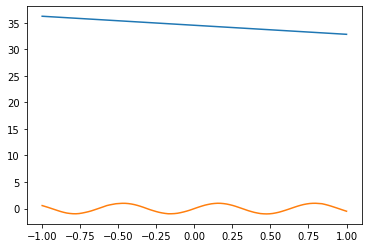

In [125]:
plt.plot(a, np.minimum(a_1, a_2))
plt.plot(a, model.predict(a))

In [108]:
get_range_box(decomon_model_1, X_min, X_max, fast=True)

(array([[35.745827]], dtype=float32), array([[-47.16249]], dtype=float32))